### Building a neural network with TensorFlow
#### In this module we are going to build a neural network for regression. Regression is the prediction of a real-valued number given some inputs. 

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Let's generate some data, in this case, a noisy sine wave as plotted below

In [72]:
n_observations = 1000
xs = np.linspace(-3.0, 3.0, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)

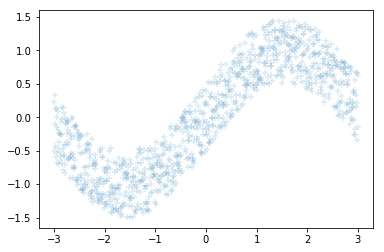

In [73]:
plt.scatter(xs, ys, alpha=0.15, marker = '+')
plt.show()
# alpha makes the points transparent and marker changes it from dots to +'s

#### We are going to use placeholders from now on. Placeholder for X and Y are as follows

In [74]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

sess = tf.InteractiveSession()

In [75]:
n = tf.random_normal([1000]).eval()
n_ = tf.random_normal([1000], stddev = 0.1).eval()

(array([   4.,   22.,   54.,  191.,  278.,  262.,  131.,   43.,   12.,    3.]),
 array([-0.33506247, -0.26562283, -0.19618319, -0.12674354, -0.0573039 ,
         0.01213574,  0.08157539,  0.15101503,  0.22045467,  0.28989432,
         0.35933396]),
 <a list of 10 Patch objects>)

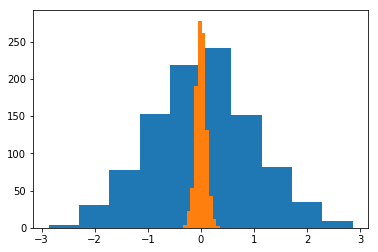

In [76]:
plt.hist(n) # plt.hist(n, 20) gives answer with 20 buckets
plt.hist(n_) # We need initial values much closer to 0 for initializing the weights

#### We need two parameters, weight W and bias B for our model

In [77]:
W = tf.Variable(tf.random_normal([1], dtype = tf.float32, stddev = 0.1, name = 'weight'))
B = tf.Variable(tf.constant([1], dtype = tf.float32), name = 'bias')

#### We need to define model, and a cost function

In [78]:
# Perceptron model (or Linear regression)
Y_ = W*X + B  

In [79]:
def distance(y, y_):
    return tf.abs(y-y_)

In [80]:
# cost = distance(Y_, tf.sin(X))
cost = tf.reduce_mean(distance(Y_, Y))

In [81]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

### Now we have defined the variables, we need to run the code

In [82]:
n_iterations = 100
for _ in range(n_iterations):
    sess.run(optimizer, feed_dict = {X:xs, Y:ys})
    training_cost = sess.run(cost, feed_dict = {X:xs, Y:ys})
    print training_cost

FailedPreconditionError: Attempting to use uninitialized value Variable_10
	 [[Node: Variable_10/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_10"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_10)]]

Caused by op u'Variable_10/read', defined at:
  File "/home/sriram/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/sriram/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-5e3778c2b2eb>", line 1, in <module>
    W = tf.Variable(tf.random_normal([1], dtype = tf.float32, stddev = 0.1, name = 'weight'))
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 215, in __init__
    dtype=dtype)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 327, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1128, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sriram/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_10
	 [[Node: Variable_10/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_10"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_10)]]
